Python implementation of the Kalman PW (ES322)

In [1]:
import numpy as np

In [2]:
Ts = 0.1
x0, y0 = 10., 10.

# transition matrix
A = np.array([[1, Ts, 0, 0],
              [0,  1, 0, 0],
              [0, 0, 1, Ts],
              [0, 0, 0, 1]])

# input matrix
B = np.array([[0, 0],
              [Ts, 0],
              [0, 0],
              [0, Ts]])

# measurement matrix
C = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])

In [3]:
V = 0.01 * np.eye(4) # process noise
W = 10.0 * np.eye(2) # measurement noise (measurements = x and y coords)

In [4]:
N = 400
u = np.zeros((2, N))
u[0, 1] = 100       # at t=0, acceleration right
u[1, 100] = 100     # at t=100*Ts, acceleration up
u[0, 200] = -200    # at t=200*Ts, acceleration left and down
u[1, 200] = -200
u[1, 350] = -300

u[1, 150:170] = 20;

In [5]:
x = np.zeros((4, N)) # matrix of state variables
x[0, 0] = x0; x[1, 0] = 0
x[2, 0] = y0; x[3, 0] = 0

for n in range(1, N-1):
    x[:, n+1] = A @ x[:, n] + B @ u[:, n]

In [36]:
y = C @ x + W @ np.random.standard_normal((2, N))

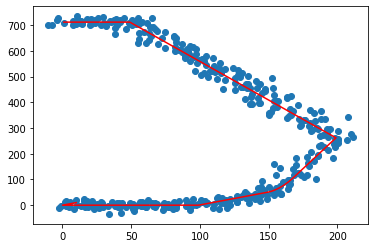

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y[0, :], y[1, :])
plt.plot(x[0, :], x[2, :], 'r')

In [38]:
def kalman(A, B, C, V, W, x0, y, u):
    n_outputs, n_vars = C.shape
    N = y.shape[1]
    xhat = np.zeros((n_vars, N))
    xhat[:, 0] = x0
    P = np.eye(n_vars);

    Ps = np.zeros((N))
    Ps[0] = np.linalg.norm(P) # keep track of covariance
    Ls = np.zeros((N-1))   # keep track of Kalman gain
    
    for n in range(N-1):
        # 1. predict
        xhat[:, n+1] = A @ xhat[:, n] + B @ u[:, n]
        P = A @ P @ A.T + V

        # 2. correct
        L = P @ C.T @ np.linalg.inv(C @ P @ C.T + W)
        xhat[:, n+1] = xhat[: , n+1] + L @ (y[:, n+1] - C @ xhat[: , n+1])
        P = P - L @ C @ P

        # for analysis afterwards
        Ps[n+1] = np.linalg.norm(P)
        Ls[n] = np.linalg.norm(L)
    
    return xhat, Ls, Ps



In [42]:
# set input to zero to simulate unknown input
u_ = np.zeros_like(u)
xhat, Ls, Ps = kalman(A,  B, C, V, W, x0, y, u_)

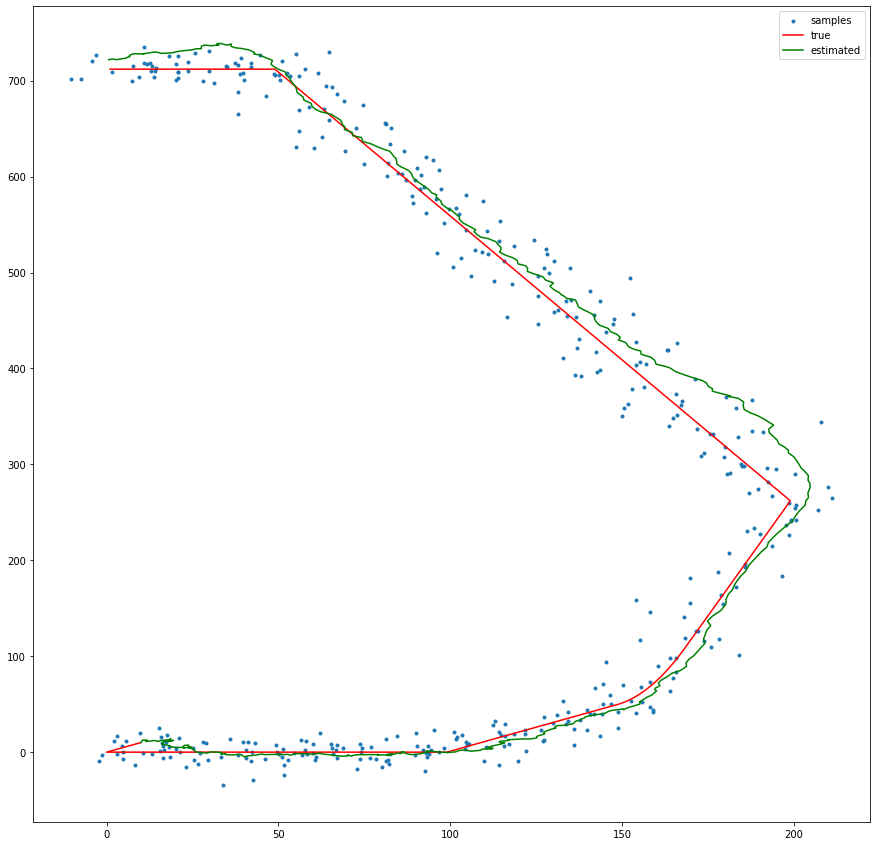

In [49]:
plt.figure(figsize=(15, 15))
plt.scatter(y[0, :], y[1, :], marker='.')
plt.plot(x[0, :], x[2, :], 'r')
plt.plot(xhat[0, :], xhat[2, :], 'g')
plt.legend(['samples', 'true', 'estimated'])

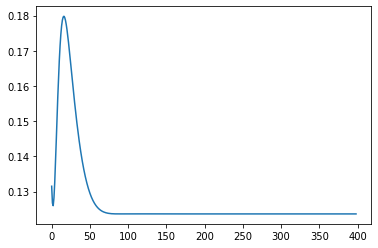

In [51]:
plt.plot(Ls)

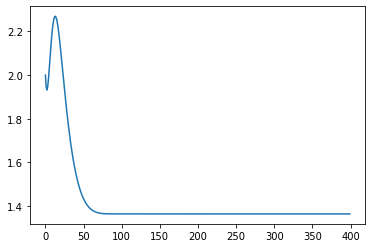

In [52]:
plt.plot(Ps)